# Problem set 1 is up

# Business Cycles

In this lecture, we are going to look at some empirical aspects of business cycles.

Business cycles are fluctuations in economic activity over time.

These include expansions (also called booms) and contractions (also called recessions).

For this lecture, we will use economic indicators from the [World Bank](https://documents.worldbank.org/en/publication/documents-reports/api) and [FRED](https://fred.stlouisfed.org).

In addition to the packages already installed by Anaconda, we will require

```python
pip install wbgapi
pip install pandas-datareader
```

Having installed those, let's make some imports:

In [1]:
#pip install pandas-datareader

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

Let's also write some code that will help with colors in our plots.

In [5]:
# Set graphical parameters
# we set the default line styles (for up to four lines) and the default colors
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'],  # solid, dash-dot, dashed, dotted
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f']) # blue, orange, green, red
plt.rc('axes', prop_cycle=cycler) # here, we tell python to make these configurations the default. rc stands for runtime configuration

# Set the size of figures:
plt.rcParams["figure.figsize"] = (6, 4)

## Data Acquisition

We will use the World Bank’s data API `wbgapi` and `pandas_datareader` to retrieve data.

We can use `wb.series.info` with the argument `q` to query available data from the World Bank.

For example, let’s retrieve the GDP growth data ID to query GDP growth data.

In [7]:
wb.series.info(q='GDP growth')

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


If we are not sure what the exact name is, we can search by keywords (or go to the WorldBank's website and search there):

In [9]:
wb.series.info(q = 'GDP')

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)"
EN.GHG.CO2.RT.GDP.KD,Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP)
EN.GHG.CO2.RT.GDP.PP.KD,Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)


Now we use this series' ID to obtain the data

In [11]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020,NaN
GRC,Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,...,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124,NaN
GBR,United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,...,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966,NaN
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002,NaN
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556,NaN


We can look at the series’ metadata to learn more about the series.

In [15]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

## GDP growth rate

First we look at GDP growth.

Let’s source our data from the World Bank and clean it.

In [17]:
# Use the series ID retrieved before
#gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
#            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
#            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

In [18]:
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.679020,NaN
Greece,NaN,13.203841,0.364811,11.844866,9.409677,10.768011,6.494501,5.669485,7.203719,11.563668,...,-0.228302,-0.031795,1.473125,2.064673,2.277181,-9.196231,8.654498,5.743649,2.332124,NaN
United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,1.939138,...,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.339966,NaN
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002,NaN
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556,NaN


We write a function to generate plots for individual countries taking into account the recessions.

In [20]:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted. 

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    ylim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params) # the two asterisks "**" unpack the dictionary "g_params"
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params) # "v" tells python to span a vertical region, and we provide the start and end values on the x-axis
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

Let's start with the US:

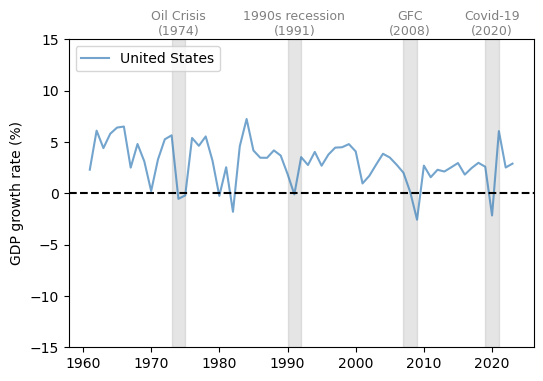

In [23]:
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

GDP growth is positive on average and trending slightly downward over time.

We also see fluctuations of GDP growth over time, some of which are quite large.

Let’s look at a few more countries to get a basis for comparison.

The United Kingdom (UK) has a similar pattern to the US, with a slow decline in the growth rate and significant fluctuations.

Notice the very large dip during the Covid-19 pandemic.

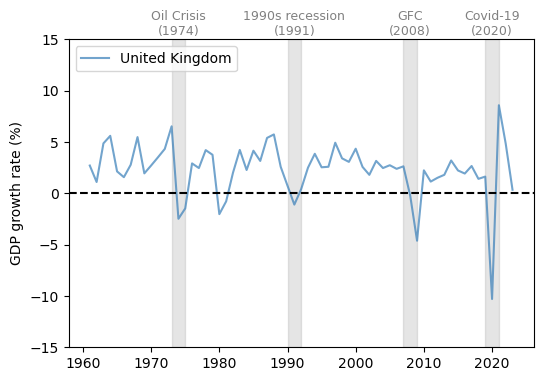

In [26]:
fig, ax = plt.subplots()

country = 'United Kingdom'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s consider Japan, which experienced rapid growth in the 1960s and 1970s, followed by slowed expansion in the past two decades.

Major dips in the growth rate coincided with the Oil Crisis of the 1970s, the Global Financial Crisis (GFC) and the Covid-19 pandemic.

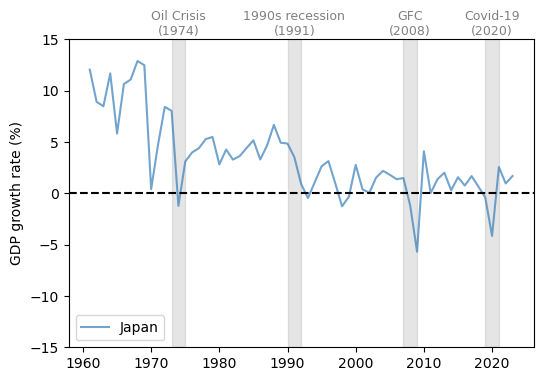

In [28]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s study Greece.

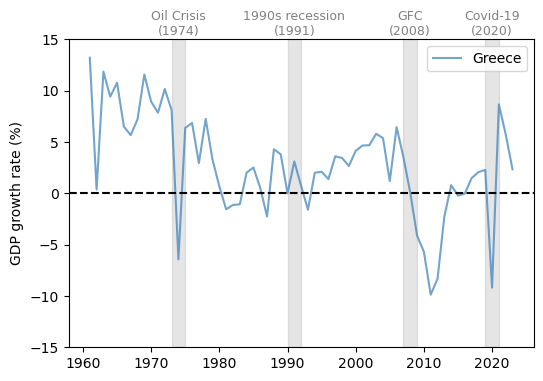

In [30]:
fig, ax = plt.subplots()

country = 'Greece'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Greece experienced a very large drop in GDP growth around 2010-2011, during the peak of the Greek debt crisis.

Next let’s consider Argentina.

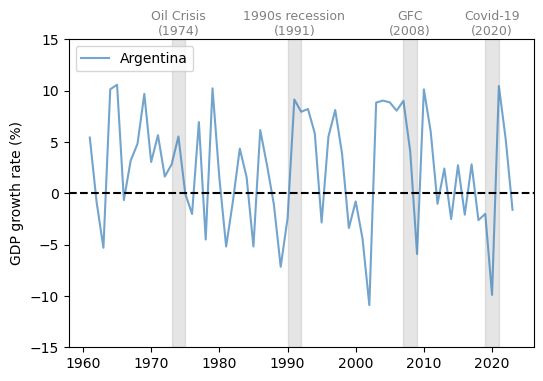

In [32]:
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Notice that Argentina has experienced far more volatile cycles than the economies examined above.

At the same time, Argentina’s growth rate did not fall during the two developed economy recessions in the 1970s and 1990s.

## Exercise to do in class:

Use `wb.series.info()` to find the data series containing inflation (based on the GDP deflator) and plot the inflation rates for the US, the UK, Japan and Argentina. What do you think, when and where are people more worried about or more "attentive" to inflation?

In [45]:
wb.series.info(q = 'Inflation')

id,value
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
,3 elements


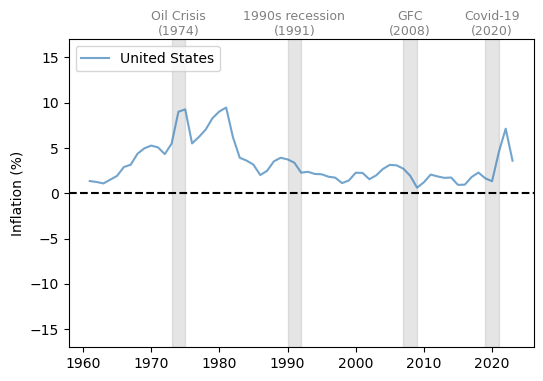

In [46]:
# Use the series ID retrieved before
inflation = wb.data.DataFrame('NY.GDP.DEFL.KD.ZG',
            ['USA', 'GBR', 'JPN','ARG'], 
            labels=True)
inflation = inflation.set_index('Country')
inflation.columns = inflation.columns.str.replace('YR', '').astype(int)
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'Inflation (%)'
plot_series(inflation, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim = 17)
plt.show()

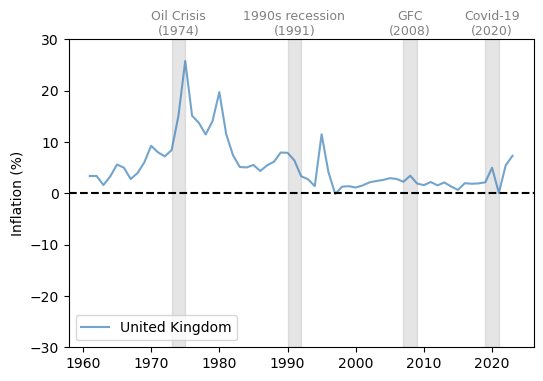

In [49]:
fig, ax = plt.subplots()

country = 'United Kingdom'
plot_series(inflation, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim = 30)
plt.show()

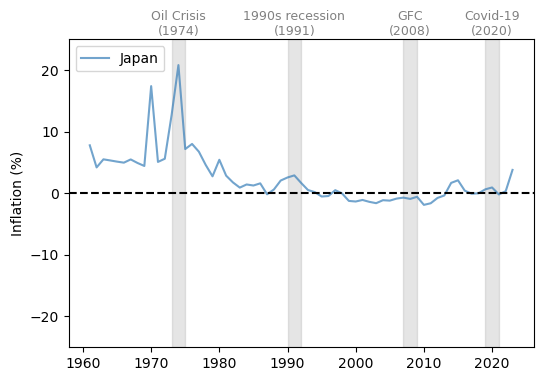

In [51]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(inflation, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim = 25)
plt.show()

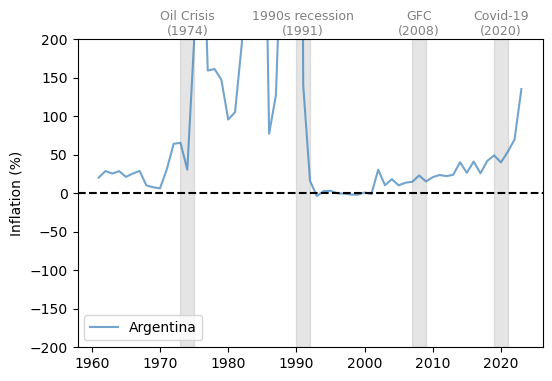

In [52]:
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(inflation, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params, ylim = 200)
plt.show()

These days, people worldwide state that their biggest worry is [inflation.](https://www.ipsos.com/en-us/what-worries-world)

But in the US, for example, that seems to be a more recent phenomenon (compare page 12 in the [2022 report](https://www.ipsos.com/sites/default/files/ct/news/documents/2023-01/Global%20Report%20-%20What%20Worries%20the%20World%20Dec22.pdf) with page 25 in the [2018 report](https://www.ipsos.com/sites/default/files/ct/news/documents/2018-08/www-july-2018.pdf)).

People tend to worry more about and to be more attentive to inflation when inflation is higher (here is a [very nice recent paper](https://www.dropbox.com/scl/fi/yeoamgrozlmvee4mt0qob/draft-2024-02-16.pdf?rlkey=daiga3nnju904l6s7zv9evn0b&e=1&dl=0) by my colleague Oli Coibion and coauthors that looks at attention to inflation over time across many countries).

In a recent [paper of mine](https://opfaeuti.github.io/website/IAT.pdf), I show how this played a key role in the recent inflation surge in the US.

Here is Figure 1 from that paper, showing some suggestive evidence that attention (here measured by [Google searches](https://trends.google.com/trends/explore?date=all&geo=US&q=inflation,taylor%20swift&hl=en) of "inflation") increased strongly in 2021.

<div>
<img src="attachment:b48216a8-5601-41d8-b4c8-b374d310d795.png" width="300"/>
</div>

(By the way, if you are interested in that kind of data, you have to be careful when you do cross-country comparisons. First, because everything is normalized to have the maximum at 100 and second, because of different [languages](https://trends.google.com/trends/explore?date=all&geo=AR&q=inflacion,taylor%20swift,inflation&hl=en).)


In another paper I am working on, we show a similar pattern for German households and firms, but that these patterns are especially pronounced for those that have experienced inflation previously:
<div>
<img src="attachment:a342507d-7da7-44d6-a75b-3457183b6c5b.png" width="500"/>
</div>


## Unemployment

Another important measure of business cycles is the unemployment rate.

We study unemployment using data from FRED spanning from 1929-1942 to 1948-2022, combined unemployment rate data over 1942-1948 estimated by the Census Bureau.

In [56]:
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(1942, 6, 1)
print(start_date)

unrate_history = web.DataReader('M0892AUSM156SNBR', 
                    'fred', start_date,end_date)
unrate_history.rename(columns={'M0892AUSM156SNBR': 'UNRATE'}, 
                inplace=True)

start_date = datetime.datetime(1948, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

unrate = web.DataReader('UNRATE', 'fred', 
                    start_date, end_date)

1929-01-01 00:00:00


Let’s plot the unemployment rate in the US from 1929 to 2022 with recessions defined by the NBER.

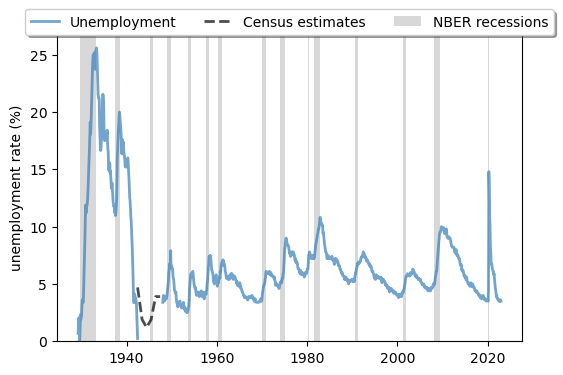

In [58]:
# We use the census bureau's estimate for the unemployment rate 
# between 1942 and 1948
years = [datetime.datetime(year, 6, 1) for year in range(1942, 1948)]
unrate_census = [4.7, 1.9, 1.2, 1.9, 3.9, 3.9]

unrate_census = {'DATE': years, 'UNRATE': unrate_census}
unrate_census = pd.DataFrame(unrate_census)
unrate_census.set_index('DATE', inplace=True)

# Obtain the NBER-defined recession periods
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)

fig, ax = plt.subplots()

ax.plot(unrate_history, **g_params, 
        color='#377eb8', 
        linestyle='-', linewidth=2, label = 'Unemployment')
ax.plot(unrate_census, **g_params, 
        color='black', linestyle='--', 
        label='Census estimates', linewidth=2)
ax.plot(unrate, **g_params, color='#377eb8', 
        linestyle='-', linewidth=2)

# Draw gray boxes according to NBER recession indicators
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER recessions')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('unemployment rate (%)')

plt.show()

The plot shows that

- expansions and contractions of the labor market have been highly correlated with recessions.
- cycles are, in general, asymmetric: sharp rises in unemployment are followed by slow recoveries.

It also shows us how unique labor market conditions were in the US during the post-pandemic recovery.

The labor market recovered at an unprecedented rate after the shock in 2020-2021.

## Synchronization

In our previous discussion, we found that developed economies have had relatively synchronized periods of recession.

At the same time, this synchronization did not appear in Argentina until the 2000s.

Let’s examine this trend further.

With slight modifications, we can use our previous function to draw a plot that includes multiple countries.

In [61]:
def plot_comparison(data, countries, 
                        ylabel, txt_pos, y_lim, ax, 
                        g_params, b_params, t_params, 
                        baseline=0):
    """
    Plot multiple series on the same graph

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    countries : list
        List of countries to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the lines
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """
    
    # Allow the function to go through more than one series
    for country in countries:
        ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if y_lim != None:
        ax.set_ylim([-y_lim, y_lim])
    ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos, 
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos, 
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos, 
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos, 
            'Covid-19\n(2020)', **t_params) 
    if baseline != None:
        ax.hlines(y=baseline, xmin=ax.get_xlim()[0], 
                  xmax=ax.get_xlim()[1], color='black', 
                  linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

Here we compare the GDP growth rate of developed economies and developing economies.

In [64]:
# Obtain GDP growth rate for a list of countries
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['CHN', 'USA', 'DEU', 'BRA', 'ARG', 'GBR', 'JPN', 'MEX'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

We use the United Kingdom, United States, Germany, and Japan as examples of developed economies.

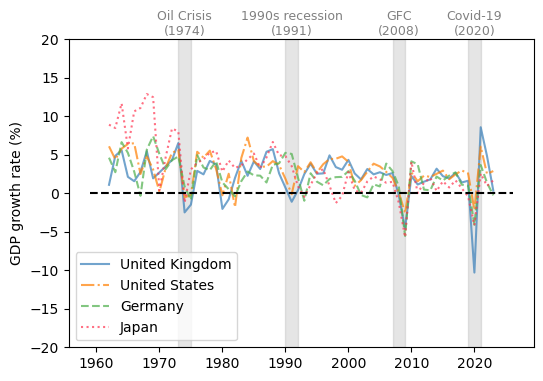

In [66]:
fig, ax = plt.subplots()
countries = ['United Kingdom', 'United States', 'Germany', 'Japan']
ylabel = 'GDP growth rate (%)'
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel,
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

Let's look at the correlations between those countries:

In [70]:
correlation_matrix = gdp_growth.loc[countries].T.corr()

# Display the correlation matrix
print(correlation_matrix)

Country         United Kingdom  United States   Germany     Japan
Country                                                          
United Kingdom        1.000000       0.690555  0.542800  0.445600
United States         0.690555       1.000000  0.551548  0.526210
Germany               0.542800       0.551548  1.000000  0.638495
Japan                 0.445600       0.526210  0.638495  1.000000


We choose Brazil, China, Argentina, and Mexico as representative developing economies.

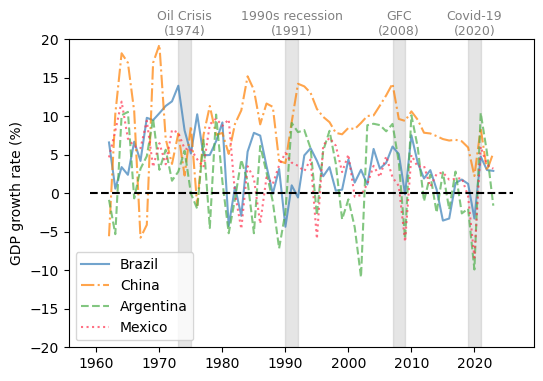

In [74]:
fig, ax = plt.subplots()
countries = ['Brazil', 'China', 'Argentina', 'Mexico']
plot_comparison(gdp_growth.loc[countries, 1962:], 
                countries, ylabel, 
                0.1, 20, ax, 
                g_params, b_params, t_params)
plt.show()

In [77]:
# Let's look at the correlations of those countries and the US:
countries = ['United States','Brazil', 'China', 'Argentina', 'Mexico']
correlation_matrix = gdp_growth.loc[countries].T.corr()

# Display the correlation matrix
print(correlation_matrix) # there is less synchronization, maybe with the exception of Mexico (an important trading partner of the US)

Country        United States    Brazil     China  Argentina    Mexico
Country                                                              
United States       1.000000  0.237816  0.077619   0.215029  0.431303
Brazil              0.237816  1.000000 -0.097792   0.307498  0.358094
China               0.077619 -0.097792  1.000000   0.184411 -0.044898
Argentina           0.215029  0.307498  0.184411   1.000000  0.325475
Mexico              0.431303  0.358094 -0.044898   0.325475  1.000000


The comparison of GDP growth rates above suggests that business cycles are becoming more synchronized in 21st-century recessions. Let's check this:

In [80]:
correlation_matrix = gdp_growth.loc[countries,2000:].T.corr()

# Display the correlation matrix
print(correlation_matrix) # there is less synchronization, maybe with the exception of Mexico (an important trading partner of the US)

Country        United States    Brazil     China  Argentina    Mexico
Country                                                              
United States       1.000000  0.410939  0.193111   0.572601  0.870502
Brazil              0.410939  1.000000  0.572100   0.587180  0.556399
China               0.193111  0.572100  1.000000   0.539500  0.325177
Argentina           0.572601  0.587180  0.539500   1.000000  0.660129
Mexico              0.870502  0.556399  0.325177   0.660129  1.000000


Despite the synchronization in GDP growth, the experience of individual countries during the recession often differs.

We use the unemployment rate and the recovery of labor market conditions as another example.

Here we compare the unemployment rate of the United States, the United Kingdom, Japan, and France.

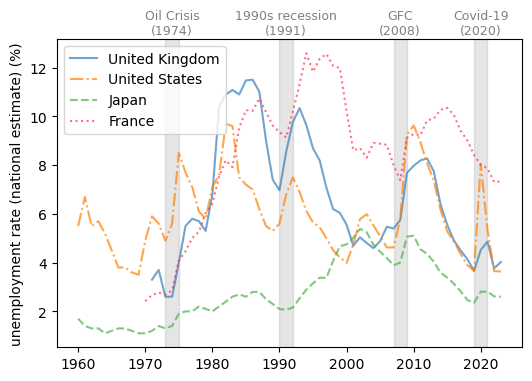

In [83]:
unempl_rate = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS',
    ['USA', 'FRA', 'GBR', 'JPN'], labels=True)
unempl_rate = unempl_rate.set_index('Country')
unempl_rate.columns = unempl_rate.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = ['United Kingdom', 'United States', 'Japan', 'France']
ylabel = 'unemployment rate (national estimate) (%)'
plot_comparison(unempl_rate, countries, 
                ylabel, 0.05, None, ax, g_params, 
                b_params, t_params, baseline=None)
plt.show()

We see that France, with its strong labor unions, typically experiences relatively slow labor market recoveries after negative shocks.

We also notice that Japan has a history of very low and stable unemployment rates.

## Leading indicators and correlated factors

Examining leading indicators and correlated factors helps policymakers to understand the causes and results of business cycles.

We will discuss potential leading indicators and correlated factors from three perspectives: consumption, production, and credit level.

### Consumption

Consumption depends on consumers’ expectations and confidence towards their income and the overall performance of the economy in the future.

One widely cited indicator for consumer confidence is the consumer sentiment index published by the University of Michigan.

Here we plot the University of Michigan Consumer Sentiment Index and year-on-year core consumer price index (CPI) change from 1978-2022 in the US.

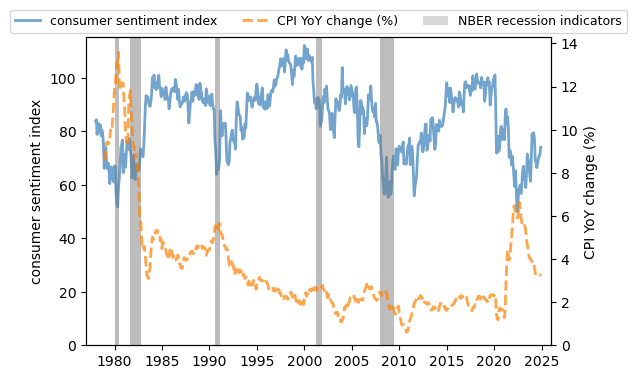

In [87]:
start_date = datetime.datetime(1978, 1, 1)
end_date = datetime.datetime(2024, 12, 31)

# Limit the plot to a specific range
start_date_graph = datetime.datetime(1977, 1, 1)
end_date_graph = datetime.datetime(2025, 12, 31)

nber = web.DataReader('USREC', 'fred', start_date, end_date)
consumer_confidence = web.DataReader('UMCSENT', 'fred', 
                                start_date, end_date)

fig, ax = plt.subplots()
ax.plot(consumer_confidence, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2)
ax.fill_between(nber.index, 0, 1, 
            where=nber['USREC']==1, #fill when recession indicator==1
            color='grey', edgecolor='none',
            alpha=0.3, 
            transform=ax.get_xaxis_transform(), 
            label='NBER recession indicators')
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel('consumer sentiment index')

# Plot CPI on another y-axis
ax_t = ax.twinx()
inflation = web.DataReader('CPILFESL', 'fred', 
                start_date, end_date).pct_change(12)*100

# Add CPI on the legend without drawing the line again
ax_t.plot(2020, 0, **g_params, linestyle='-', 
          linewidth=2, label='consumer sentiment index')
ax_t.plot(inflation, **g_params, 
          color='#ff7f00', linestyle='--', 
          linewidth=2, label='CPI YoY change (%)')

ax_t.fill_between(nber.index, 0, 1,
                  where=nber['USREC']==1, 
                  color='grey', edgecolor='none',
                  alpha=0.3, 
                  transform=ax.get_xaxis_transform(), 
                  label='NBER recession indicators')
ax_t.set_ylim([0, ax_t.get_ylim()[1]])
ax_t.set_xlim([start_date_graph, end_date_graph])
ax_t.legend(loc='upper center',
            bbox_to_anchor=(0.5, 1.11),
            ncol=3, fontsize=9)
ax_t.set_ylabel('CPI YoY change (%)')
plt.show()

evidence correlational- when inflation high, sentiment is low 

In [89]:
df_combined = pd.concat([consumer_confidence,inflation], axis=1)
df_combined.corr()

,UMCSENT,CPILFESL
UMCSENT,1.000000,-0.417103
CPILFESL,-0.417103,1.000000


We see that

- consumer sentiment often remains high during expansions and drops before recessions.
- there is a clear negative correlation between consumer sentiment and the CPI.

When the price of consumer goods rises, consumer confidence diminishes.

## Exercise to do in class

Compute the correlation between consumer confidence and the unemployment rate.


In [94]:
unrate=web.DataReader('UNRATE','fred',start_date, end_date)
pd.concat([consumer_confidence,unrate, inflation], axis=1).corr()

,UMCSENT,UNRATE,CPILFESL
UMCSENT,1.000000,-0.376664,-0.417103
UNRATE,-0.376664,1.000000,0.122722
CPILFESL,-0.417103,0.122722,1.000000


### Production

Real industrial output is highly correlated with recessions in the economy.


We plot the real industrial output change from the previous year from 1919 to 2022 in the US to show this trend.

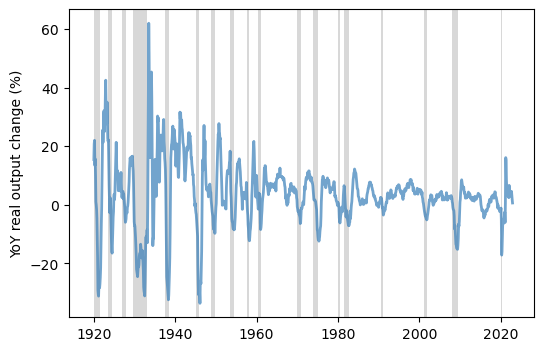

In [97]:
start_date = datetime.datetime(1919, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

nber = web.DataReader('USREC', 'fred', 
                    start_date, end_date)
industrial_output = web.DataReader('INDPRO', 'fred', 
                    start_date, end_date).pct_change(12)*100 #pct_change(12) represents monthly data 

fig, ax = plt.subplots()
ax.plot(industrial_output, **g_params, 
        color='#377eb8', linestyle='-', 
        linewidth=2, label='Industrial production index')
ax.fill_between(nber.index, 0, 1,
                where=nber['USREC']==1, 
                color='grey', edgecolor='none',
                alpha=0.3, 
                transform=ax.get_xaxis_transform(), 
                label='NBER recession indicators')
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])
ax.set_ylabel('YoY real output change (%)')
plt.show()

### Credit level

Credit contractions often occur during recessions, as lenders become more cautious and borrowers become more hesitant to take on additional debt.

This is due to factors such as a decrease in overall economic activity and gloomy expectations for the future.

One example is domestic credit to the private sector by banks in the UK.

The following graph shows the domestic credit to the private sector as a percentage of GDP by banks from 1970 to 2022 in the UK.

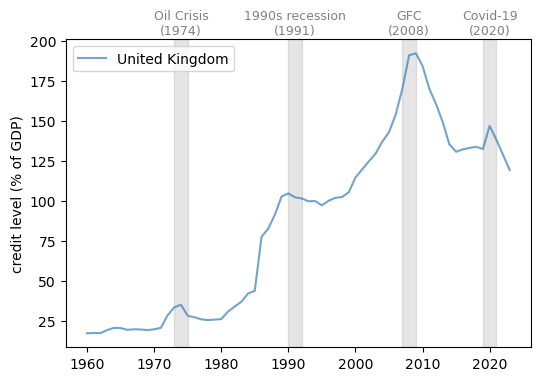

In [99]:
private_credit = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', 
                ['GBR'], labels=True)
private_credit = private_credit.set_index('Country')
private_credit.columns = private_credit.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = 'United Kingdom'
ylabel = 'credit level (% of GDP)'
ax = plot_series(private_credit, countries, 
                 ylabel, 0.05, ax, g_params, b_params, 
                 t_params, ylim=None, baseline=None)
plt.show()

Note that the credit rises during economic expansions and stagnates or even contracts after recessions.

### Exercise to do in class

Plot `private_credit` for the US. Look at what happend before the GFC. Do you think that development may have played a role for the following recession?

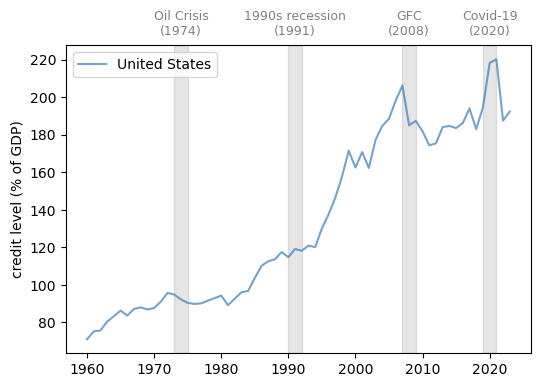

In [103]:
private_credit = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', 
                ['USA'], labels=True)
private_credit = private_credit.set_index('Country')
private_credit.columns = private_credit.columns.str.replace('YR', '').astype(int)

fig, ax = plt.subplots()

countries = 'United States'
ylabel = 'credit level (% of GDP)'
ax = plot_series(private_credit, countries, 
                 ylabel, 0.05, ax, g_params, b_params, 
                 t_params, ylim=None, baseline=None)
plt.show()

There are studies, including [this one](https://onlinelibrary.wiley.com/doi/pdf/10.1111/jmcb.12069?casa_token=sk90FhiSYOkAAAAA%3A0SsChSuBgTUzCF32zzjyO11NMGf0QyTSkroXbzOa3CmjvYXAWil3CXSahJrdgdBWVnFXcAPt4bFQ2Uk), that say that more credit-intensive expansions tend to be followed by deeper recessions and slower recoveries.

The authors of that paper created a great [historical database](https://www.macrohistory.net/database/) covering many (48) macro- and financial variables going back to 1870 and covering 18 countries. 